# ASSIGNMENT - 07 Implementation of Perceptron
## NAMES:- C SURYA KIRAN , KALLA BHARATH VARDHAN
## REG Nos :- 21BCE1110 , 21BCE5846
## SUBJECT :- Machine Learning Lab BCSE209P


# **a) Implement OR function, AND function using Perceptron. (Implement from Scratch)**

**OR Gate**

Unit Step Function (unitStep):

Defines a function unitStep(v) that returns 1 if v is greater than or equal to 0, otherwise returns 0. Perceptron Model (perceptronModel):

Takes input vector x, weight vector w, and bias b. Calculates the weighted sum of inputs v using dot product of w and x, adds bias b. Passes v through the unit step function and returns the result y. Logical OR Function (OR):

Sets weights w and bias b for the OR operation. Calls the perceptronModel function with input vector x, weights w, and bias b to perform the logical OR operation. Testing:

Tests the OR function with different input combinations: [0, 0], [0, 1], [1, 0], [1, 1]. Prints the results.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def unitStep(v):
    if v >= 0:
        return 1
    else:
        return 0

In [ ]:
def perceptronModel(x, w, b):
    v = np.dot(w, x) + b
    y = unitStep(v)
    return y

In [ ]:
def OR(x):
    w = np.array([1, 1])
    b = -0.5
    return perceptronModel(x, w, b)

In [ ]:
test1 = np.array([0, 0])
test2 = np.array([0, 1])
test3 = np.array([1, 0])
test4 = np.array([1, 1])
print(OR(test1))
print(OR(test2))
print(OR(test3))
print(OR(test4))

0
1
1
1


**AND Gate**

Unit Step Function (unitStep):

Defines a function unitStep(v) that returns 1 if v is greater than or equal to 0, otherwise returns 0. Perceptron Model (perceptronModel):

Takes input vector x, weight vector w, and bias b. Calculates the weighted sum of inputs v using the dot product of w and x, adds bias b. Passes v through the unit step function and returns the result y. Logical AND Function (AND):

Sets weights w and bias b for the AND operation. Calls the perceptronModel function with input vector x, weights w, and bias b to perform the logical AND operation. Testing:

Tests the AND function with different input combinations: [0, 0], [0, 1], [1, 0], [1, 1]. Prints the results.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def unitStep(v):
    if v >= 0:
        return 1
    else:
        return 0

In [ ]:
def perceptronModel(x, w, b):
    v = np.dot(w, x) + b
    y = unitStep(v)
    return y

In [ ]:
def AND(x):
    w = np.array([1,1])
    b = -1.5
    return perceptronModel(x, w, b)

In [ ]:
test1 = np.array([0, 0])
test2 = np.array([0, 1])
test3 = np.array([1, 0])
test4 = np.array([1, 1])

print(AND(test1))
print(AND(test2))
print(AND(test3))
print(AND(test4))

0
0
0
1


# **b) i) Single Layer Perceptron - Binary classifier**

# **Objective**

The Single Layer Perceptron (SLP) serves as a foundational model for binary classification tasks, aiming to delineate a linear decision boundary within the feature space to separate input data into two distinct classes. Its key aspects include weighted inputs, activation functions, iterative learning, and the perceptron learning algorithm, which collectively enable it to refine weights and make categorical decisions iteratively until convergence or a predefined threshold is reached.

# **DataSet description**

This dataset contains various health-related indicators for a sample of individuals. Here's a brief description of each column:

HeartDiseaseorAttack: Indicates whether the individual has had a heart disease or heart attack (binary: 0 = No, 1 = Yes).
HighBP: High blood pressure status (binary: 0 = No, 1 = Yes).
HighChol: High cholesterol status (binary: 0 = No, 1 = Yes).
CholCheck: Frequency of cholesterol check (categorical).
BMI: Body Mass Index (continuous).
Smoker: Smoking status (binary: 0 = No, 1 = Yes).
Stroke: History of stroke (binary: 0 = No, 1 = Yes).
Diabetes: Diabetes status (binary: 0 = No, 1 = Yes).
PhysActivity: Level of physical activity (categorical).
Fruits: Frequency of fruit consumption (categorical).
Veggies: Frequency of vegetable consumption (categorical).
HvyAlcoholConsump: Heavy alcohol consumption status (binary: 0 = No, 1 = Yes).
AnyHealthcare: Access to any healthcare (binary: 0 = No, 1 = Yes).
NoDocbcCost: No doctor because of cost (binary: 0 = No, 1 = Yes).
GenHlth: General health assessment (categorical).
MentHlth: Mental health assessment (categorical).
PhysHlth: Physical health assessment (categorical).
DiffWalk: Difficulty walking status (binary: 0 = No, 1 = Yes).
Sex: Gender of the individual (binary: 0 = Female, 1 = Male).
Age: Age of the individual (continuous).
Education: Educational level (categorical).
-Income: Income level (categorical).
This dataset contains a variety of health-related information, lifestyle factors, and demographics for a group of individuals, making it suitable for exploring correlations and potential risk factors for heart disease and other health conditions.

In [ ]:
dataset.shape

(253661, 16)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253661 entries, 0 to 253660
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HeartDiseaseorAttack  253661 non-null  int64
 1   HighBP                253661 non-null  int64
 2   HighChol              253661 non-null  int64
 3   CholCheck             253661 non-null  int64
 4   BMI                   253661 non-null  int64
 5   Smoker                253661 non-null  int64
 6   Stroke                253661 non-null  int64
 7   Diabetes              253661 non-null  int64
 8   PhysActivity          253661 non-null  int64
 9   HvyAlcoholConsump     253661 non-null  int64
 10  AnyHealthcare         253661 non-null  int64
 11  GenHlth               253661 non-null  int64
 12  MentHlth              253661 non-null  int64
 13  PhysHlth              253661 non-null  int64
 14  Age                   253661 non-null  int64
 15  Income                253661 non-n

In [ ]:
dataset.head()

HeartDiseaseorAttack  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
0                     0       1         1          1   40       1       0   
1                     0       0         0          0   25       1       0   
2                     0       1         1          1   28       0       0   
3                     0       1         0          1   27       0       0   
4                     0       1         1          1   24       0       0   

   Diabetes  PhysActivity  HvyAlcoholConsump  AnyHealthcare  GenHlth  \
0         0             0                  0              1        5   
1         0             1                  0              0        3   
2         0             0                  0              1        5   
3         0             1                  0              1        2   
4         0             1                  0              1        2   

   MentHlth  PhysHlth  Age  Income  
0        18        15    9       3  
1         0         0    7       1  
2        30        30    9       8  
3         0         0   11       6  
4         3         0   11       4

In [ ]:
dataset.describe()

HeartDiseaseorAttack         HighBP       HighChol      CholCheck  \
count         253661.000000  253661.000000  253661.000000  253661.000000   
mean               0.094173       0.428990       0.424113       0.962667   
std                0.292070       0.494933       0.494209       0.189578   
min                0.000000       0.000000       0.000000       0.000000   
25%                0.000000       0.000000       0.000000       1.000000   
50%                0.000000       0.000000       0.000000       1.000000   
75%                0.000000       1.000000       1.000000       1.000000   
max                1.000000       1.000000       1.000000       1.000000   

                 BMI         Smoker         Stroke       Diabetes  \
count  253661.000000  253661.000000  253661.000000  253661.000000   
mean       28.382475       0.443186       0.040570       0.296904   
std         6.608638       0.496763       0.197292       0.698147   
min        12.000000       0.000000       0.000000       0.000000   
25%        24.000000       0.000000       0.000000       0.000000   
50%        27.000000       0.000000       0.000000       0.000000   
75%        31.000000       1.000000       0.000000       0.000000   
max        98.000000       1.000000       1.000000       2.000000   

        PhysActivity  HvyAlcoholConsump  AnyHealthcare        GenHlth  \
count  253661.000000      253661.000000  253661.000000  253661.000000   
mean        0.756577           0.056201       0.951049       2.511379   
std         0.429149           0.230310       0.215766       1.068472   
min         0.000000           0.000000       0.000000       1.000000   
25%         1.000000           0.000000       1.000000       2.000000   
50%         1.000000           0.000000       1.000000       2.000000   
75%         1.000000           0.000000       1.000000       3.000000   
max         1.000000           1.000000       1.000000       5.000000   

            MentHlth       PhysHlth            Age         Income  
count  253661.000000  253661.000000  253661.000000  253661.000000  
mean        3.184778       4.242028       8.032197       6.054052  
std         7.412822       8.717905       3.054203       2.071036  
min         0.000000       0.000000       1.000000       1.000000  
25%         0.000000       0.000000       6.000000       5.000000  
50%         0.000000       0.000000       8.000000       7.000000  
75%         2.000000       3.000000      10.000000       8.000000  
max        30.000000      30.000000      13.000000       8.000000

In [ ]:
dataset.corr()

HeartDiseaseorAttack    HighBP  HighChol  CholCheck  \
HeartDiseaseorAttack              1.000000  0.209347  0.180744   0.044202   
HighBP                            0.209347  1.000000  0.298215   0.098508   
HighChol                          0.180744  0.298215  1.000000   0.085643   
CholCheck                         0.044202  0.098508  0.085643   1.000000   
BMI                               0.052927  0.213749  0.106738   0.034500   
Smoker                            0.114451  0.097014  0.091299  -0.009922   
Stroke                            0.202978  0.129568  0.092608   0.024158   
Diabetes                          0.180220  0.271601  0.209057   0.067545   
PhysActivity                     -0.087284 -0.125269 -0.078000   0.004205   
HvyAlcoholConsump                -0.028983 -0.003966 -0.011539  -0.023727   
AnyHealthcare                     0.018726  0.038421  0.042228   0.117623   
GenHlth                           0.258380  0.300503  0.208409   0.046589   
MentHlth                          0.064632  0.056466  0.062059  -0.008366   
PhysHlth                          0.181750  0.161245  0.121765   0.031775   
Age                               0.221588  0.344452  0.272309   0.090330   
Income                           -0.140966 -0.171245 -0.085469   0.014277   

                           BMI    Smoker    Stroke  Diabetes  PhysActivity  \
HeartDiseaseorAttack  0.052927  0.114451  0.202978  0.180220     -0.087284   
HighBP                0.213749  0.097014  0.129568  0.271601     -0.125269   
HighChol              0.106738  0.091299  0.092608  0.209057     -0.078000   
CholCheck             0.034500 -0.009922  0.024158  0.067545      0.004205   
BMI                   1.000000  0.013788  0.020167  0.224427     -0.147348   
Smoker                0.013788  1.000000  0.061188  0.062921     -0.087443   
Stroke                0.020167  0.061188  1.000000  0.107203     -0.069141   
Diabetes              0.224427  0.062921  0.107203  1.000000     -0.121924   
PhysActivity         -0.147348 -0.087443 -0.069141 -0.121924      1.000000   
HvyAlcoholConsump    -0.048743  0.101614 -0.016950 -0.057879      0.012375   
AnyHealthcare        -0.018468 -0.023244  0.008775  0.015406      0.035525   
GenHlth               0.239211  0.163159  0.177933  0.302585     -0.266180   
MentHlth              0.085327  0.092216  0.070186  0.073515     -0.125598   
PhysHlth              0.121176  0.116489  0.148957  0.176324     -0.219226   
Age                  -0.036610  0.120610  0.126980  0.185001     -0.092533   
Income               -0.100163 -0.124005 -0.128595 -0.171483      0.198491   

                      HvyAlcoholConsump  AnyHealthcare   GenHlth  MentHlth  \
HeartDiseaseorAttack          -0.028983       0.018726  0.258380  0.064632   
HighBP                        -0.003966       0.038421  0.300503  0.056466   
HighChol                      -0.011539       0.042228  0.208409  0.062059   
CholCheck                     -0.023727       0.117623  0.046589 -0.008366   
BMI                           -0.048743      -0.018468  0.239211  0.085327   
Smoker                         0.101614      -0.023244  0.163159  0.092216   
Stroke                        -0.016950       0.008775  0.177933  0.070186   
Diabetes                      -0.057879       0.015406  0.302585  0.073515   
PhysActivity                   0.012375       0.035525 -0.266180 -0.125598   
HvyAlcoholConsump              1.000000      -0.010484 -0.036722  0.024717   
AnyHealthcare                 -0.010484       1.000000 -0.040822 -0.052709   
GenHlth                       -0.036722      -0.040822  1.000000  0.301661   
MentHlth                       0.024717      -0.052709  0.301661  1.000000   
PhysHlth                      -0.026415      -0.008278  0.524395  0.353608   
Age                           -0.034585       0.138058  0.152424 -0.092071   
Income                         0.053603       0.158033 -0.370051 -0.209831   

                      PhysHlth       Age    Income  
Heart

# **Exploratory Analytics**

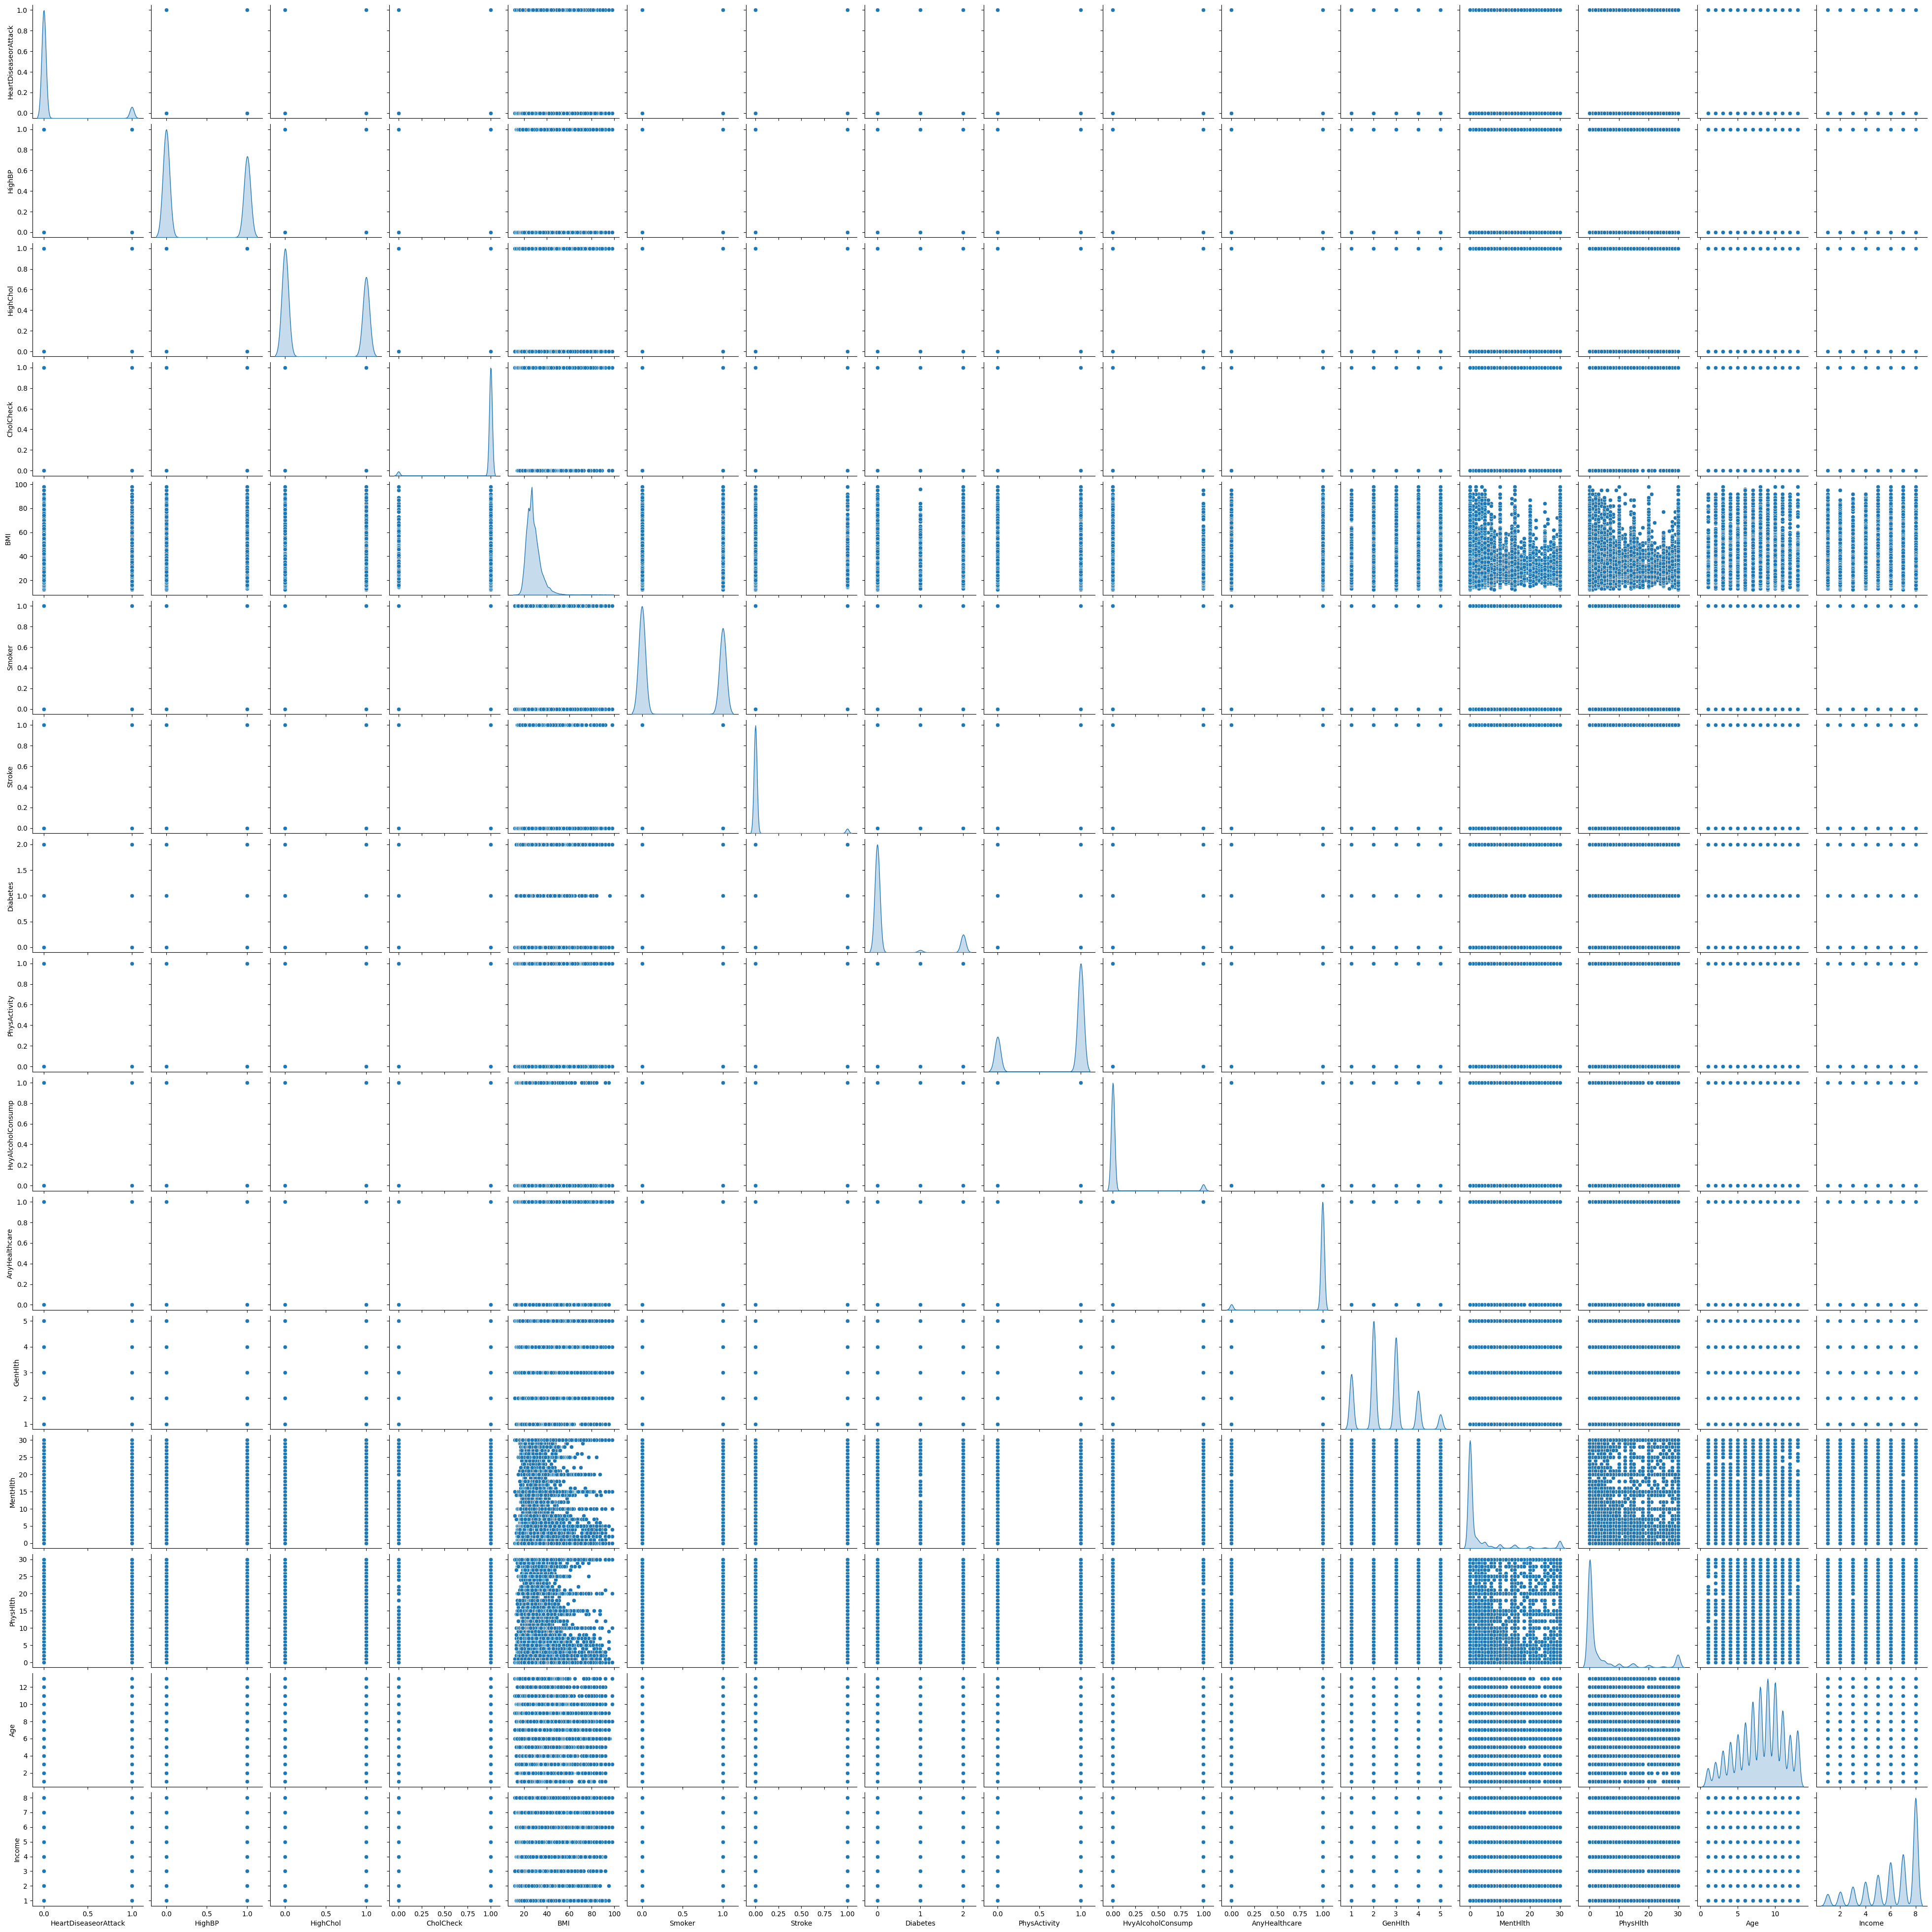

In [ ]:
sns.pairplot(dataset,diag_kind='kde')

<Axes: >

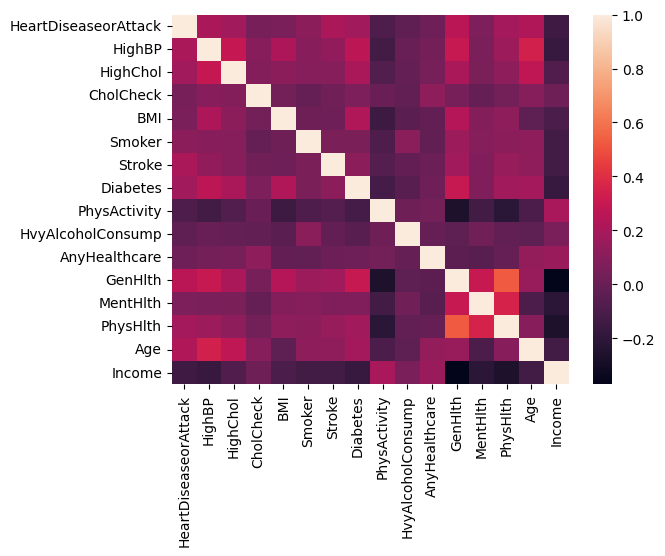

In [ ]:
sns.heatmap(dataset.corr())

<Axes: xlabel='HighBP', ylabel='HeartDiseaseorAttack'>

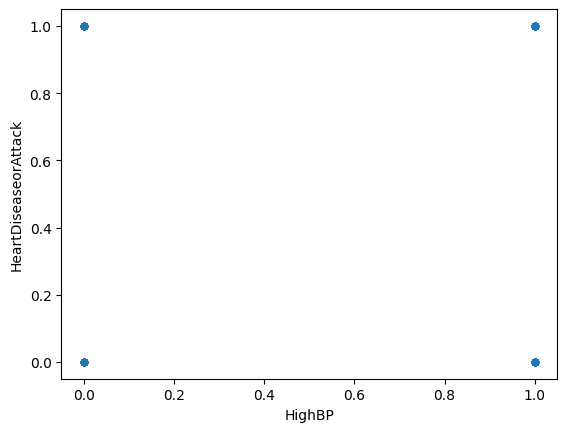

In [ ]:
dataset.plot(kind='scatter', x='HighBP', y='HeartDiseaseorAttack')

<Axes: xlabel='HighChol', ylabel='HeartDiseaseorAttack'>

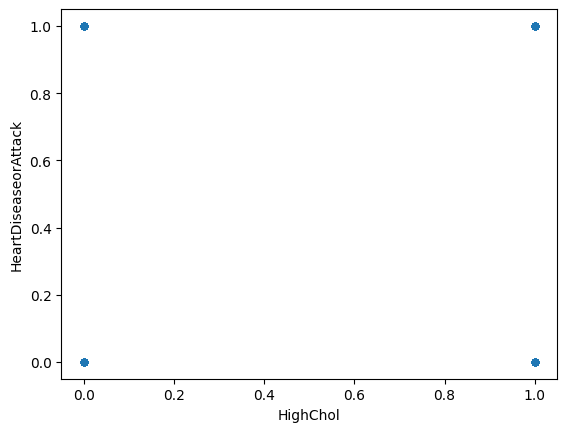

In [ ]:
dataset.plot(kind='scatter', x='HighChol', y='HeartDiseaseorAttack')

<Axes: xlabel='CholCheck', ylabel='HeartDiseaseorAttack'>

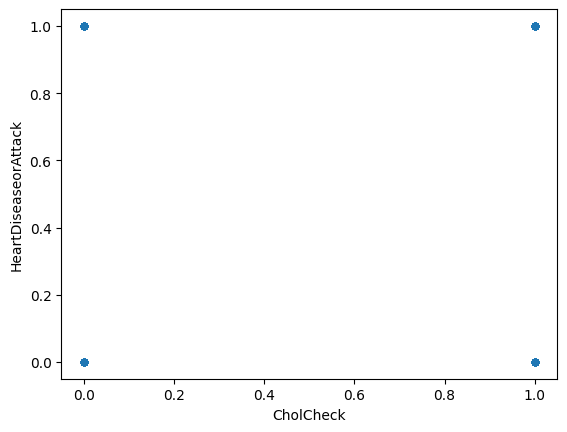

In [ ]:
dataset.plot(kind='scatter', x='CholCheck', y='HeartDiseaseorAttack')

<Axes: xlabel='BMI', ylabel='HeartDiseaseorAttack'>

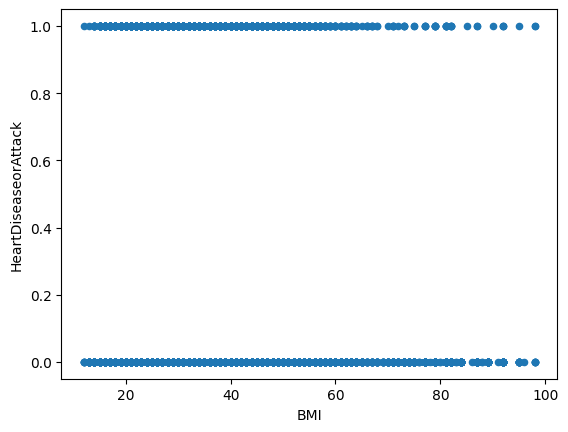

In [ ]:
dataset.plot(kind='scatter', x='BMI', y='HeartDiseaseorAttack')

<Axes: xlabel='Smoker', ylabel='HeartDiseaseorAttack'>

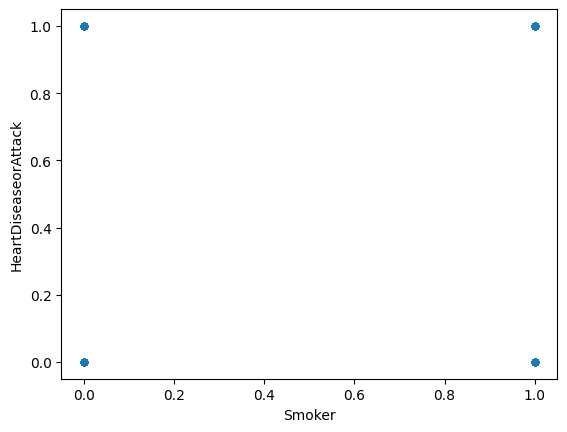

In [ ]:
dataset.plot(kind='scatter', x='Smoker', y='HeartDiseaseorAttack')


<Axes: xlabel='Stroke', ylabel='HeartDiseaseorAttack'>

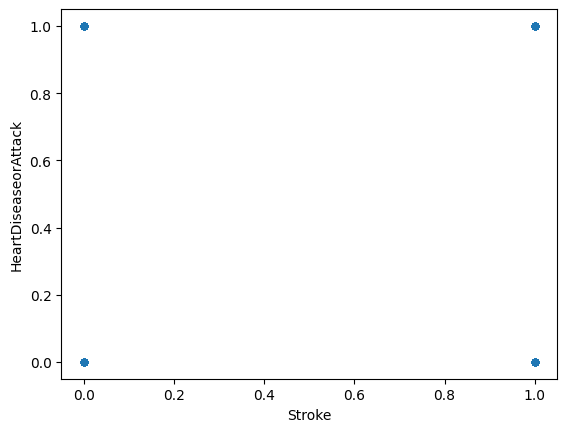

In [ ]:
dataset.plot(kind='scatter', x='Stroke', y='HeartDiseaseorAttack')

<Axes: xlabel='Diabetes', ylabel='HeartDiseaseorAttack'>

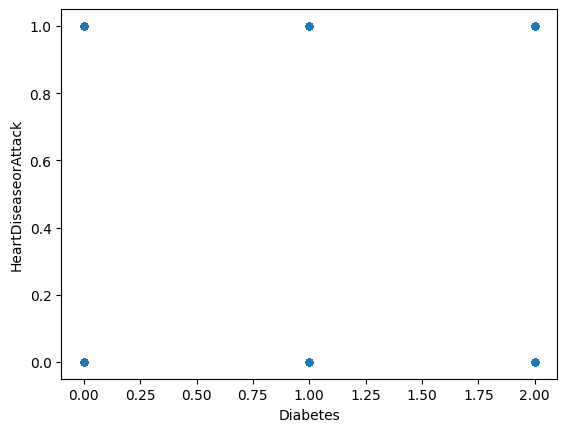

In [ ]:
dataset.plot(kind='scatter', x='Diabetes', y='HeartDiseaseorAttack')

<Axes: xlabel='PhysActivity', ylabel='HeartDiseaseorAttack'>

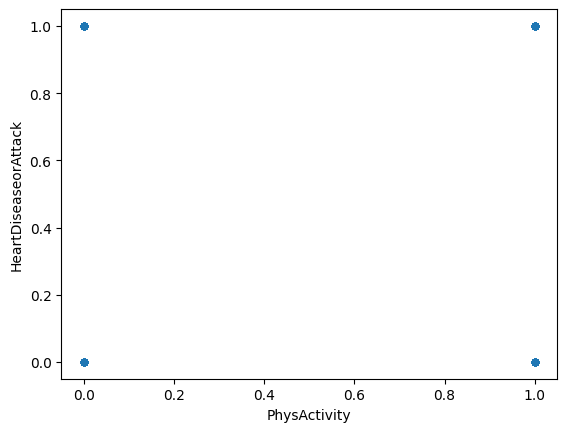

In [ ]:
dataset.plot(kind='scatter', x='PhysActivity', y='HeartDiseaseorAttack')

<Axes: xlabel='MentHlth', ylabel='HeartDiseaseorAttack'>

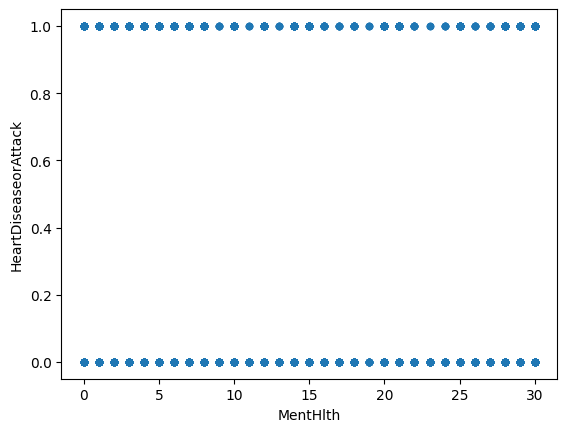

In [ ]:
dataset.plot(kind='scatter', x='MentHlth', y='HeartDiseaseorAttack')

<Axes: xlabel='PhysHlth', ylabel='HeartDiseaseorAttack'>

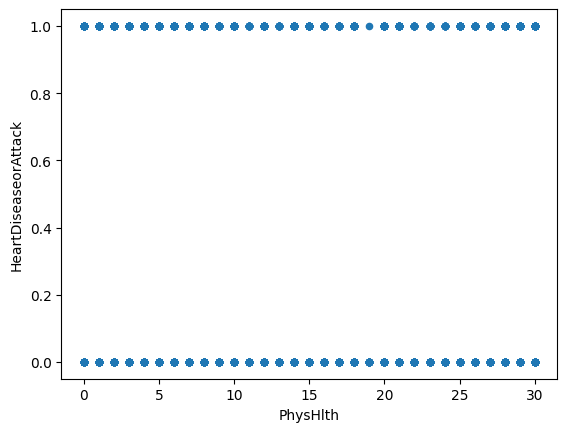

In [ ]:
dataset.plot(kind='scatter', x='PhysHlth', y='HeartDiseaseorAttack')

# **Methodology**

The provided functions implements a perceptron algorithm for binary classification tasks. The perceptron training function (perceptron_train) initializes random weights and a bias, then iterates over the input data points. At each iteration, it computes the activation using the tangent hyperbolic function, adjusts the weights based on the activation and expected output, and prints the updated weights. The perceptron test function (perceptron_test) applies the trained weights to new input data to predict the labels. Finally, the scoring function (score) compares the predicted labels with the actual labels to compute the accuracy score. The main code segment trains the perceptron on a portion of the data, tests it on the remaining data, and prints the accuracy score.

In [ ]:
dataset=pd.read_csv('/content/heart_disease_health_indicators.csv')


In [ ]:
def activation_func(value):
    return ((np.exp(value)-np.exp(-value))/(np.exp(value)+np.exp(-value)))

In [ ]:
def perceptron_train(in_data,labels,alpha):
    X=np.array(in_data)
    y=np.array(labels)
    weights=np.random.random(X.shape[1])
    original=weights
    bias=np.random.random_sample()
    for key in range(X.shape[0]):
        a=activation_func(np.matmul(np.transpose(weights),X[key]))
        yn=0
        if a>=0.7:
            yn=1
        elif a<=(-0.7):
            yn=-1
        weights=weights+alpha*(yn-y[key])*X[key]
        print('Iteration '+str(key)+': '+str(weights))
    print('Difference: '+str(weights-original))
    return weights

In [ ]:
def perceptron_test(in_data,label_shape,weights):
    X=np.array(in_data)
    y=np.zeros(label_shape)
    for key in range(X.shape[1]):
        a=activation_func((weights*X[key]).sum())
        y[key]=0
        if a>=0.7:
            y[key]=1
        elif a<=(-0.7):
            y[key]=-1
    return y

In [ ]:
def score(result,labels):
    difference=result-np.array(labels)
    correct_ctr=0
    for elem in range(difference.shape[0]):
        if difference[elem]==0:
            correct_ctr+=1
    score=correct_ctr*100/difference.size
    print('Score='+str(score))

In [ ]:
divider = np.random.rand(len(dataset)) < 0.70
d_train=dataset[divider]
d_test=dataset[~divider]

In [ ]:
d_train_y=d_train['HeartDiseaseorAttack']
d_train_X=d_train.drop(['HeartDiseaseorAttack'],axis=1)

d_test_y=d_test['HeartDiseaseorAttack']
d_test_X=d_test.drop(['HeartDiseaseorAttack'],axis=1)

In [ ]:
# Learning rate
alpha = 0.01

# Train
weights = perceptron_train(d_train_X, d_train_y, alpha)

Iteration 0: [0.61899133 0.50106047 0.85584005 0.72221217 0.63050483 0.47073477
 0.92029843 0.16618452 0.03023946 0.76412402 0.8836416  0.20589634
 0.26045191 0.38112472 0.51645792]
Iteration 1: [0.62899133 0.51106047 0.86584005 1.00221217 0.63050483 0.47073477
 0.92029843 0.16618452 0.03023946 0.77412402 0.9336416  0.50589634
 0.56045191 0.47112472 0.59645792]
Iteration 2: [0.63899133 0.51106047 0.87584005 1.27221217 0.63050483 0.47073477
 0.92029843 0.17618452 0.03023946 0.78412402 0.9536416  0.50589634
 0.56045191 0.58112472 0.65645792]
Iteration 3: [0.64899133 0.52106047 0.88584005 1.51221217 0.63050483 0.47073477
 0.92029843 0.18618452 0.03023946 0.79412402 0.9736416  0.53589634
 0.56045191 0.69112472 0.69645792]
Iteration 4: [0.65899133 0.53106047 0.89584005 1.76221217 0.64050483 0.47073477
 0.92029843 0.19618452 0.03023946 0.80412402 0.9936416  0.53589634
 0.58045191 0.79112472 0.77645792]
Iteration 5: [0.66899133 0.54106047 0.90584005 2.01221217 0.65050483 0.47073477
 0.9202984

<ipython-input-12-50a6c182dbf0>:2: RuntimeWarning: overflow encountered in exp
  return ((np.exp(value)-np.exp(-value))/(np.exp(value)+np.exp(-value)))
<ipython-input-12-50a6c182dbf0>:2: RuntimeWarning: invalid value encountered in scalar divide
  return ((np.exp(value)-np.exp(-value))/(np.exp(value)+np.exp(-value)))


Streaming output truncated to the last 5000 lines.
  20.4736416   -1.21410366  -2.34954809  10.55112472  24.91645792]
Iteration 175587: [-32.86100867 -26.01893953  39.88584005  20.31221217   6.65050483
 -11.26926523 -36.86970157  39.16618452   5.94023946  35.19412402
  20.4736416   -1.21410366  -2.34954809  10.55112472  24.91645792]
Iteration 175588: [-32.86100867 -26.01893953  39.88584005  20.31221217   6.65050483
 -11.26926523 -36.86970157  39.16618452   5.94023946  35.19412402
  20.4736416   -1.21410366  -2.34954809  10.55112472  24.91645792]
Iteration 175589: [-32.86100867 -26.01893953  39.88584005  20.31221217   6.65050483
 -11.26926523 -36.86970157  39.16618452   5.94023946  35.19412402
  20.4736416   -1.21410366  -2.34954809  10.55112472  24.91645792]
Iteration 175590: [-32.86100867 -26.01893953  39.88584005  20.31221217   6.65050483
 -11.26926523 -36.86970157  39.16618452   5.94023946  35.19412402
  20.4736416   -1.21410366  -2.34954809  10.55112472  24.91645792]
Iteration 1755

In [ ]:
result_test=perceptron_test(d_test_X,d_test_y.shape,weights)

<ipython-input-12-50a6c182dbf0>:2: RuntimeWarning: overflow encountered in exp
  return ((np.exp(value)-np.exp(-value))/(np.exp(value)+np.exp(-value)))
<ipython-input-12-50a6c182dbf0>:2: RuntimeWarning: invalid value encountered in scalar divide
  return ((np.exp(value)-np.exp(-value))/(np.exp(value)+np.exp(-value)))


In [ ]:
score(result_test,d_test_y)

Score=90.5998900724998


In [ ]:
# Learning rate
alpha = 0.1

# Train
weights = perceptron_train(d_train_X, d_train_y, alpha)


Iteration 0: [0.74243915 0.47401306 1.04585747 4.20628831 0.65311384 0.81802267
 0.68459492 0.57908493 0.37173044 0.95517004 0.82616999 2.22526425
 2.45974306 1.74454533 1.09733889]
Iteration 1: [0.84243915 0.57401306 1.14585747 7.00628831 0.65311384 0.81802267
 0.68459492 0.57908493 0.37173044 1.05517004 1.32616999 5.22526425
 5.45974306 2.64454533 1.89733889]
Iteration 2: [0.94243915 0.57401306 1.24585747 9.70628831 0.65311384 0.81802267
 0.68459492 0.67908493 0.37173044 1.15517004 1.52616999 5.22526425
 5.45974306 3.74454533 2.49733889]
Iteration 3: [ 1.04243915  0.67401306  1.34585747 12.10628831  0.65311384  0.81802267
  0.68459492  0.77908493  0.37173044  1.25517004  1.72616999  5.52526425
  5.45974306  4.84454533  2.89733889]
Iteration 4: [ 1.14243915  0.77401306  1.44585747 14.60628831  0.75311384  0.81802267
  0.68459492  0.87908493  0.37173044  1.35517004  1.92616999  5.52526425
  5.65974306  5.84454533  3.69733889]
Iteration 5: [ 1.24243915  0.87401306  1.54585747 17.1062883

<ipython-input-12-50a6c182dbf0>:2: RuntimeWarning: overflow encountered in exp
  return ((np.exp(value)-np.exp(-value))/(np.exp(value)+np.exp(-value)))
<ipython-input-12-50a6c182dbf0>:2: RuntimeWarning: invalid value encountered in scalar divide
  return ((np.exp(value)-np.exp(-value))/(np.exp(value)+np.exp(-value)))


Streaming output truncated to the last 5000 lines.
  16.82616999  -2.57473575  -2.74025694  16.44454533  22.39733889]
Iteration 175603: [-65.35756085 -50.92598694 134.74585747  14.90628831   2.95311384
 -61.98197733 -37.31540508  65.87908493  30.37173044 103.85517004
  16.82616999  -2.57473575  -2.74025694  16.44454533  22.39733889]
Iteration 175604: [-65.35756085 -50.92598694 134.74585747  14.90628831   2.95311384
 -61.98197733 -37.31540508  65.87908493  30.37173044 103.85517004
  16.82616999  -2.57473575  -2.74025694  16.44454533  22.39733889]
Iteration 175605: [-65.35756085 -50.92598694 134.74585747  14.90628831   2.95311384
 -61.98197733 -37.31540508  65.87908493  30.37173044 103.85517004
  16.82616999  -2.57473575  -2.74025694  16.44454533  22.39733889]
Iteration 175606: [-65.35756085 -50.92598694 134.74585747  14.90628831   2.95311384
 -61.98197733 -37.31540508  65.87908493  30.37173044 103.85517004
  16.82616999  -2.57473575  -2.74025694  16.44454533  22.39733889]
Iteration 1756

In [ ]:
result_test=perceptron_test(d_test_X,d_test_y.shape,weights)

<ipython-input-12-50a6c182dbf0>:2: RuntimeWarning: overflow encountered in exp
  return ((np.exp(value)-np.exp(-value))/(np.exp(value)+np.exp(-value)))
<ipython-input-12-50a6c182dbf0>:2: RuntimeWarning: invalid value encountered in scalar divide
  return ((np.exp(value)-np.exp(-value))/(np.exp(value)+np.exp(-value)))


In [ ]:
score(result_test,d_test_y)

Score=90.59858141178319


In [ ]:
alpha = 0.001

# Train
weights = perceptron_train(d_train_X, d_train_y, alpha)

Iteration 0: [0.79626043 0.99615285 0.9753919  0.20378097 0.56919638 0.43231186
 0.82925262 0.75742474 0.60193691 0.12870196 0.46326768 0.23372069
 0.85266222 0.51710004 0.70604141]
Iteration 1: [0.79726043 0.99715285 0.9763919  0.23178097 0.56919638 0.43231186
 0.82925262 0.75742474 0.60193691 0.12970196 0.46826768 0.26372069
 0.88266222 0.52610004 0.71404141]
Iteration 2: [0.79826043 0.99715285 0.9773919  0.25878097 0.56919638 0.43231186
 0.82925262 0.75842474 0.60193691 0.13070196 0.47026768 0.26372069
 0.88266222 0.53710004 0.72004141]
Iteration 3: [0.79926043 0.99815285 0.9783919  0.28278097 0.56919638 0.43231186
 0.82925262 0.75942474 0.60193691 0.13170196 0.47226768 0.26672069
 0.88266222 0.54810004 0.72404141]
Iteration 4: [0.80026043 0.99915285 0.9793919  0.30778097 0.57019638 0.43231186
 0.82925262 0.76042474 0.60193691 0.13270196 0.47426768 0.26672069
 0.88466222 0.55810004 0.73204141]
Iteration 5: [0.80126043 1.00015285 0.9803919  0.33278097 0.57119638 0.43231186
 0.8292526

<ipython-input-12-50a6c182dbf0>:2: RuntimeWarning: overflow encountered in exp
  return ((np.exp(value)-np.exp(-value))/(np.exp(value)+np.exp(-value)))
<ipython-input-12-50a6c182dbf0>:2: RuntimeWarning: invalid value encountered in scalar divide
  return ((np.exp(value)-np.exp(-value))/(np.exp(value)+np.exp(-value)))


Streaming output truncated to the last 5000 lines.
Iteration 175581: [-4.29973957 -3.04284715  6.8623919  23.46378097  1.32419638 -1.02068814
 -6.35174738  7.64842474  1.44393691  5.77370196  4.96626768  1.77272069
 -1.97833778  6.91710004 27.42104141]
Iteration 175582: [-4.29973957 -3.04284715  6.8623919  23.46378097  1.32419638 -1.02068814
 -6.35174738  7.64842474  1.44393691  5.77370196  4.96626768  1.77272069
 -1.97833778  6.91710004 27.42104141]
Iteration 175583: [-4.29973957 -3.04284715  6.8623919  23.46378097  1.32419638 -1.02068814
 -6.35174738  7.64842474  1.44393691  5.77370196  4.96626768  1.77272069
 -1.97833778  6.91710004 27.42104141]
Iteration 175584: [-4.29973957 -3.04184715  6.8633919  23.48778097  1.32519638 -1.02068814
 -6.34974738  7.64842474  1.44393691  5.77470196  4.97026768  1.77272069
 -1.94833778  6.92410004 27.42204141]
Iteration 175585: [-4.29873957 -3.04084715  6.8643919  23.51178097  1.32519638 -1.02068814
 -6.34974738  7.64942474  1.44393691  5.77570196  

In [ ]:
result_test=perceptron_test(d_test_X,d_test_y.shape,weights)

<ipython-input-12-50a6c182dbf0>:2: RuntimeWarning: overflow encountered in exp
  return ((np.exp(value)-np.exp(-value))/(np.exp(value)+np.exp(-value)))
<ipython-input-12-50a6c182dbf0>:2: RuntimeWarning: invalid value encountered in scalar divide
  return ((np.exp(value)-np.exp(-value))/(np.exp(value)+np.exp(-value)))


In [ ]:
score(result_test,d_test_y)

Score=90.5998900724998


# **Result Analysis**

The experimental results reveal intriguing insights into the impact of different learning rates (alphas) on the model's performance. At alpha = 0.01 and alpha = 0.001, the model achieved remarkably similar scores of 90.5998% and demonstrated robustness to slight variations in the learning rate. Conversely, at alpha = 0.1, a marginal decrease in performance to 90.5986% was observed. This discrepancy suggests that while smaller learning rates offer stability and consistent performance, excessively high rates may hinder convergence, potentially causing erratic behavior in parameter updates. Thus, a delicate balance between exploration and exploitation is imperative to optimize model performance effectively.

# **Conclusion**

In conclusion, the experimentation underscores the critical importance of selecting an appropriate learning rate in the training of machine learning models. While both excessively low and excessively high learning rates may compromise performance, a moderate learning rate such as alpha = 0.01 emerges as a prudent choice, yielding a commendable accuracy score of 90.5998%. However, further investigation and fine-tuning may be warranted to elucidate the intricate dynamics between learning rates and model convergence, ensuring the development of robust and efficient learning algorithms tailored to specific datasets and tasks.




# **ii) Multi-Layer Perceptron for Multi-class classification**

# **Objective**

The objective of a Multi-Layer Perceptron (MLP) for multi-class classification is to build a robust and flexible model capable of discerning intricate patterns within data to accurately assign input samples to multiple predefined classes. Unlike its single-layer counterpart, the MLP integrates multiple hidden layers, each layer composed of neurons interconnected with weighted connections. Through forward propagation and backpropagation algorithms, the MLP adjusts these weights iteratively to minimize classification errors and refine the decision boundaries between classes. By harnessing non-linear activation functions and multiple layers, the MLP strives to learn nuanced relationships and feature representations, thus empowering it to effectively navigate the complexities inherent in multi-class classification tasks.

# **DataSet description**

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines. The attributes are as follows:

Class: target, the category of cultivator, discrete, values: 1, 2, 3
Alcohol: the alcohol content in the wine, numerical
Malic acid: the malic acid content in the wine, numerical
Ash: the ash content in the wine, numerical
Alcalinity of ash: the alcanity of ash present in the wine, numerical
Magnesium: the magnesium content in the wine, numerical
Total phenols: the total amount of phenols in the wine, numerical
Flavanoids: the flavanoids content in the wine, numerical
Nonflavanoid phenols: the content of nonflavanoid phenols in the wine, numerical
Proanthocyanins: the content of proanthocyanins in the wine, numerical
Hue: the amount of hue added to the wine, numerical
OD280/OD315 of diluted wines: a standard measure of the quality of wine, numerical
Proline: the proline content in the wine, numerical
Total Number of Samples: 178

Samples per class: 59, 71, 48

In [ ]:
binary.shape

(178, 12)

In [ ]:
binary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   OD280/OD315 of diluted wines  178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
dtypes: float64(10), int64(2)
memory usage: 16.8 KB


In [ ]:
binary.head()

Class  Alcohol  Malic acid   Ash  OD280/OD315 of diluted wines  Magnesium  \
0      1    14.23        1.71  2.43                          3.92        127   
1      1    13.20        1.78  2.14                          3.40        100   
2      1    13.16        2.36  2.67                          3.17        101   
3      1    14.37        1.95  2.50                          3.45        113   
4      1    13.24        2.59  2.87                          2.93        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  
0             5.64  1.04  
1             4.38  1.05  
2             5.68  1.03  
3             7.80  0.86  
4             4.32  1.04

In [ ]:
binary.describe()

Class     Alcohol  Malic acid         Ash  \
count  178.000000  178.000000  178.000000  178.000000   
mean     1.938202   13.000618    2.336348    2.366517   
std      0.775035    0.811827    1.117146    0.274344   
min      1.000000   11.030000    0.740000    1.360000   
25%      1.000000   12.362500    1.602500    2.210000   
50%      2.000000   13.050000    1.865000    2.360000   
75%      3.000000   13.677500    3.082500    2.557500   
max      3.000000   14.830000    5.800000    3.230000   

       OD280/OD315 of diluted wines   Magnesium  Total phenols  Flavanoids  \
count                    178.000000  178.000000     178.000000  178.000000   
mean                       2.611685   99.741573       2.295112    2.029270   
std                        0.709990   14.282484       0.625851    0.998859   
min                        1.270000   70.000000       0.980000    0.340000   
25%                        1.937500   88.000000       1.742500    1.205000   
50%                        2.780000   98.000000       2.355000    2.135000   
75%                        3.170000  107.000000       2.800000    2.875000   
max                        4.000000  162.000000       3.880000    5.080000   

       Nonflavanoid phenols  Proanthocyanins  Color intensity         Hue  
count            178.000000       178.000000       178.000000  178.000000  
mean               0.361854         1.590899         5.058090    0.957449  
std                0.124453         0.572359         2.318286    0.228572  
min                0.130000         0.410000         1.280000    0.480000  
25%                0.270000         1.250000         3.220000    0.782500  
50%                0.340000         1.555000         4.690000    0.965000  
75%                0.437500         1.950000         6.200000    1.120000  
max                0.660000         3.580000        13.000000    1.710000

In [ ]:
binary.corr()

Class   Alcohol  Malic acid       Ash  \
Class                         1.000000 -0.328222    0.437776 -0.049643   
Alcohol                      -0.328222  1.000000    0.094397  0.211545   
Malic acid                    0.437776  0.094397    1.000000  0.164045   
Ash                          -0.049643  0.211545    0.164045  1.000000   
OD280/OD315 of diluted wines -0.788230  0.072343   -0.368710  0.003911   
Magnesium                    -0.209179  0.270798   -0.054575  0.286587   
Total phenols                -0.719163  0.289101   -0.335167  0.128980   
Flavanoids                   -0.847498  0.236815   -0.411007  0.115077   
Nonflavanoid phenols          0.489109 -0.155929    0.292977  0.186230   
Proanthocyanins              -0.499130  0.136698   -0.220746  0.009652   
Color intensity               0.265668  0.546364    0.248985  0.258887   
Hue                          -0.617369 -0.071747   -0.561296 -0.074667   

                              OD280/OD315 of diluted wines  Magnesium  \
Class                                            -0.788230  -0.209179   
Alcohol                                           0.072343   0.270798   
Malic acid                                       -0.368710  -0.054575   
Ash                                               0.003911   0.286587   
OD280/OD315 of diluted wines                      1.000000   0.066004   
Magnesium                                         0.066004   1.000000   
Total phenols                                     0.699949   0.214401   
Flavanoids                                        0.787194   0.195784   
Nonflavanoid phenols                             -0.503270  -0.256294   
Proanthocyanins                                   0.519067   0.236441   
Color intensity                                  -0.428815   0.199950   
Hue                                               0.565468   0.055398   

                              Total phenols  Flavanoids  Nonflavanoid phenols  \
Class                             -0.719163   -0.847498              0.489109   
Alcohol                            0.289101    0.236815             -0.155929   
Malic acid                        -0.335167   -0.411007              0.292977   
Ash                                0.128980    0.115077              0.186230   
OD280/OD315 of diluted wines       0.699949    0.787194             -0.503270   
Magnesium                          0.214401    0.195784             -0.256294   
Total phenols                      1.000000    0.864564             -0.449935   
Flavanoids                         0.864564    1.000000             -0.537900   
Nonflavanoid phenols              -0.449935   -0.537900              1.000000   
Proanthocyanins                    0.612413    0.652692             -0.365845   
Color intensity                   -0.055136   -0.172379              0.139057   
Hue                                0.433681    0.543479             -0.262640   

                              Proanthocyanins  Color intensity       Hue  
Class                               -0.499130         0.265668 -0.617369  
Alcohol                              0.136698         0.546364 -0.071747  
Malic acid                          -0.220746         0.248985 -0.561296  
Ash                                  0.009652         0.258887 -0.074667  
OD280/OD315 of diluted wines         0.519067        -0.428815  0.565468  
Magnesium                            0.236441         0.199950  0.055398  
Total phenols                        0.612413        -0.055136  0.433681  
Flavanoids                           0.652692        -0.172379  0.543479  
Nonflavanoid phenols                -0.365845         0.139057 -0.262640  
Proanthocyanins                      1.000000        -0.025250  0.295544  
Color intensity                     -0.025250         1.000000 -0.521813  
Hue                                  0.295544        -0.521813  1.000000

# **Exploratory Analytics**

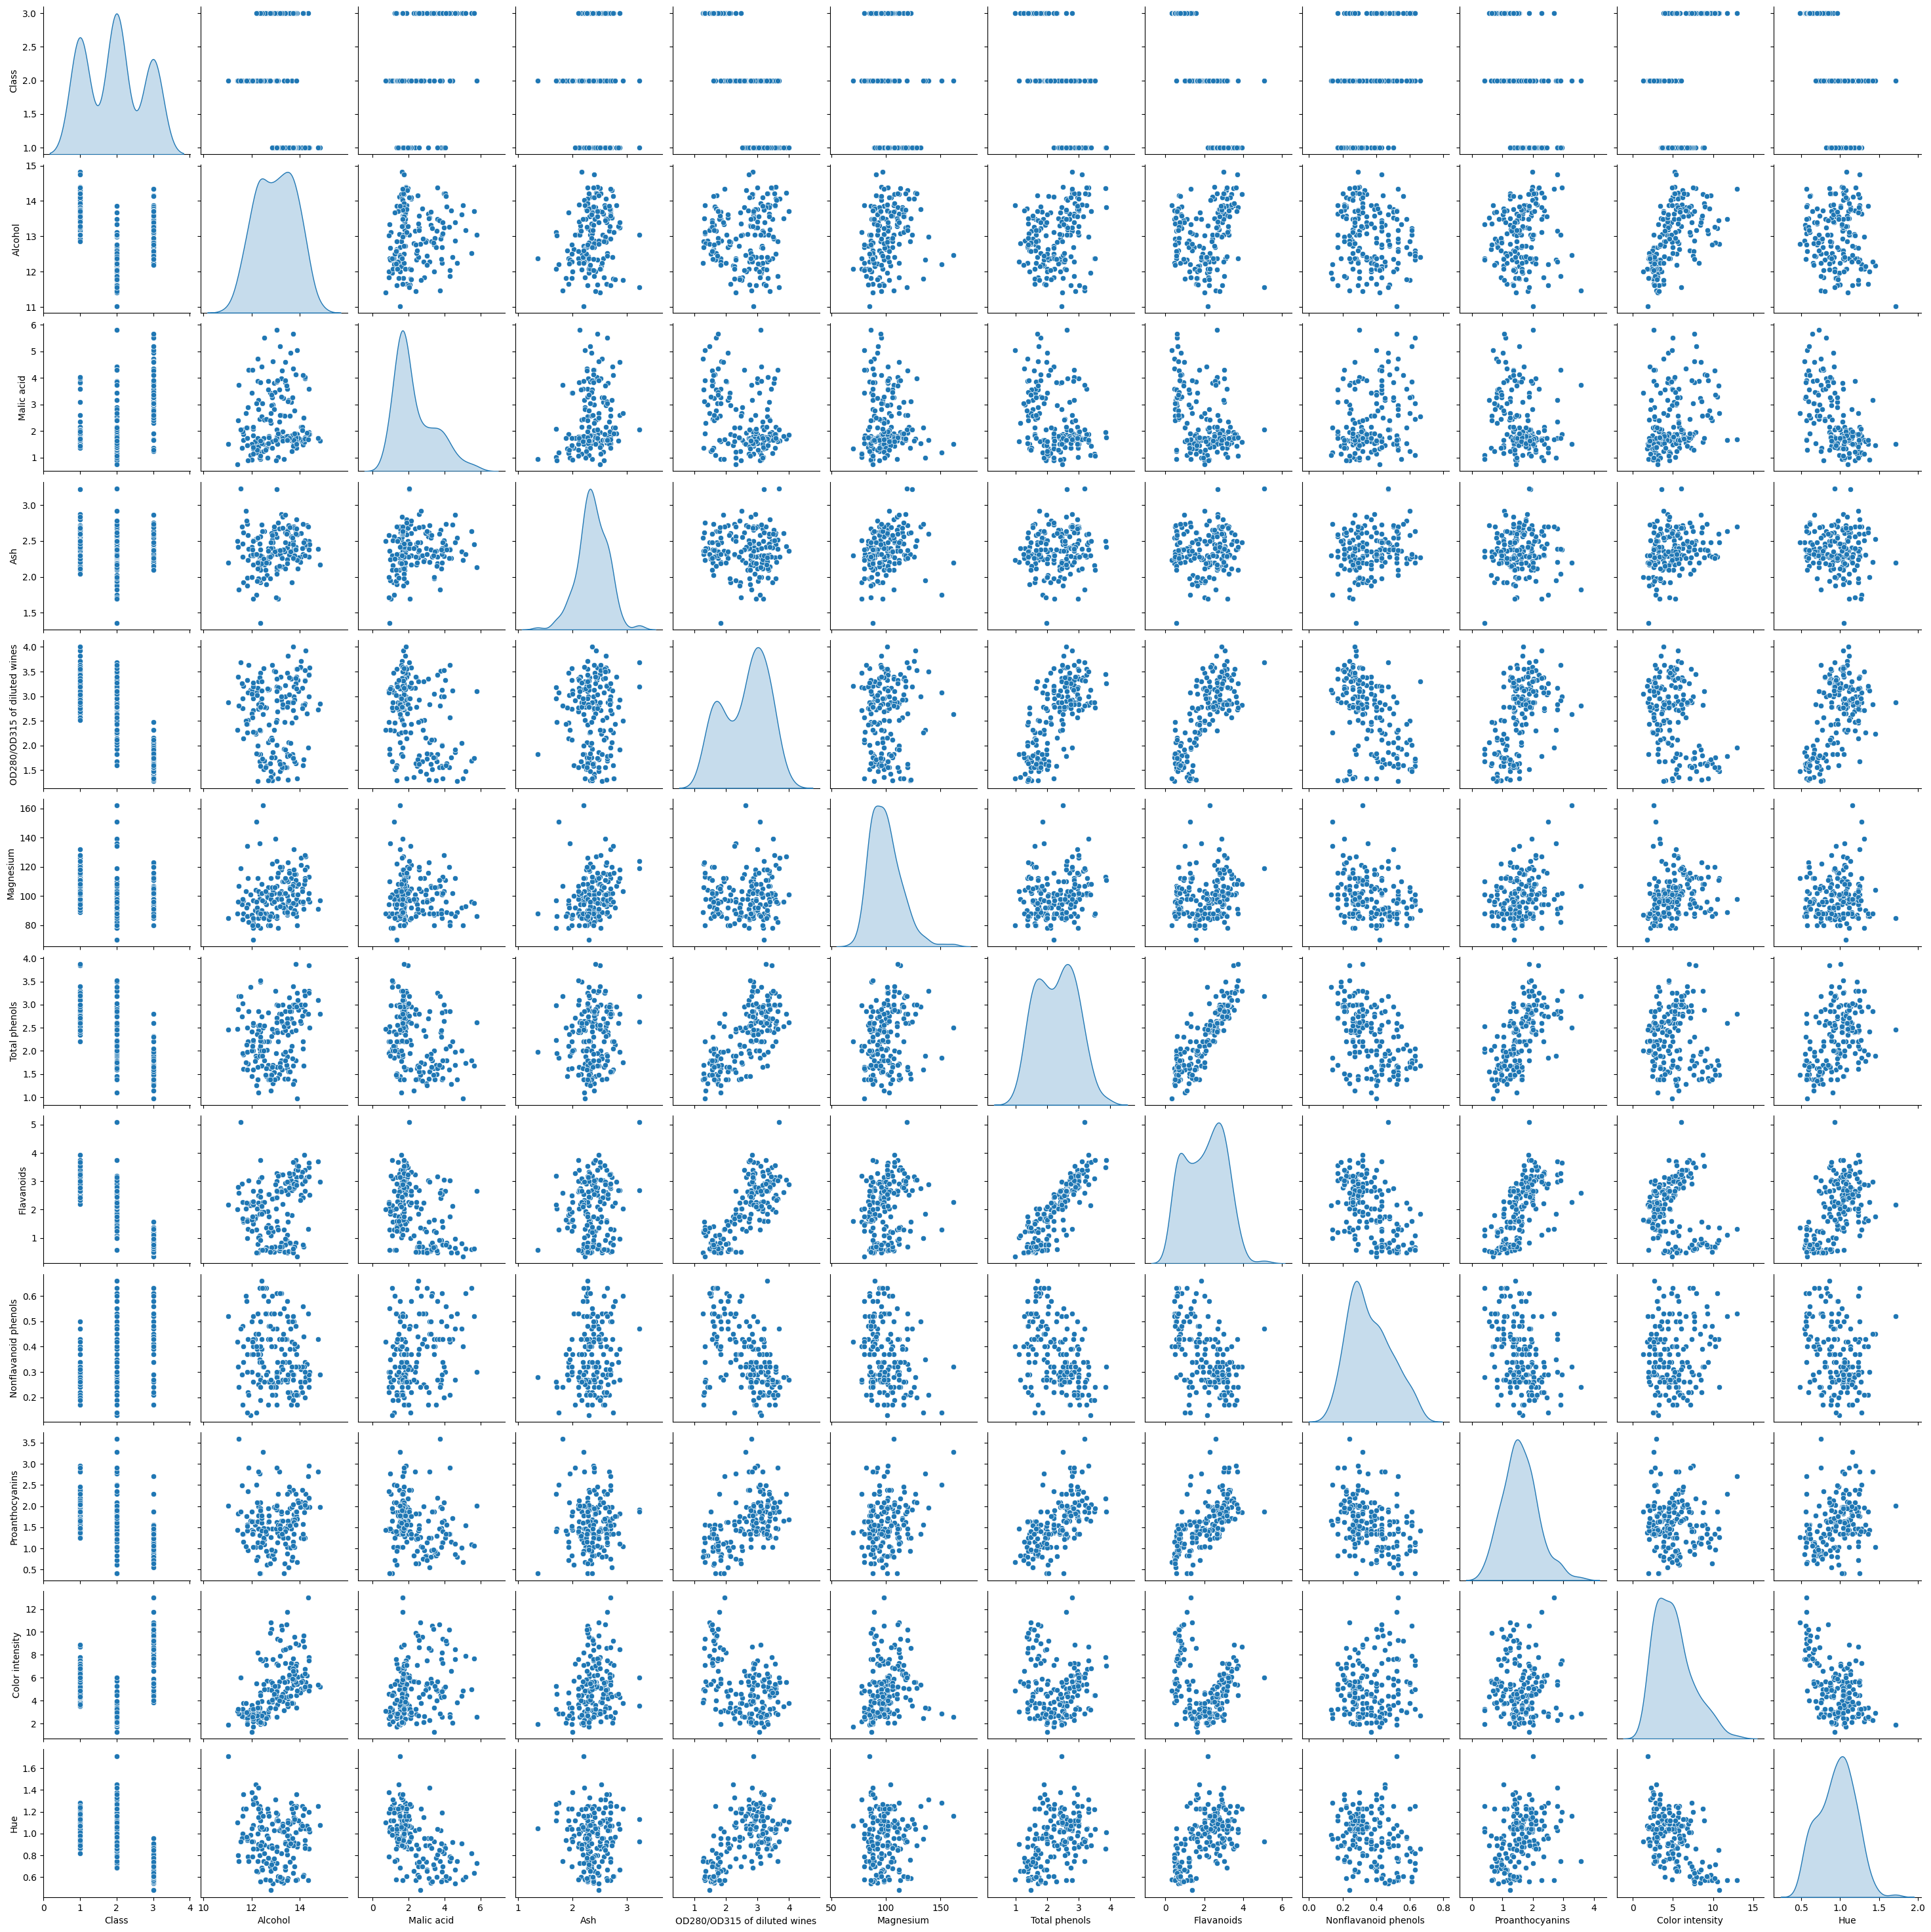

In [ ]:
sns.pairplot(binary,diag_kind='kde')

<Axes: >

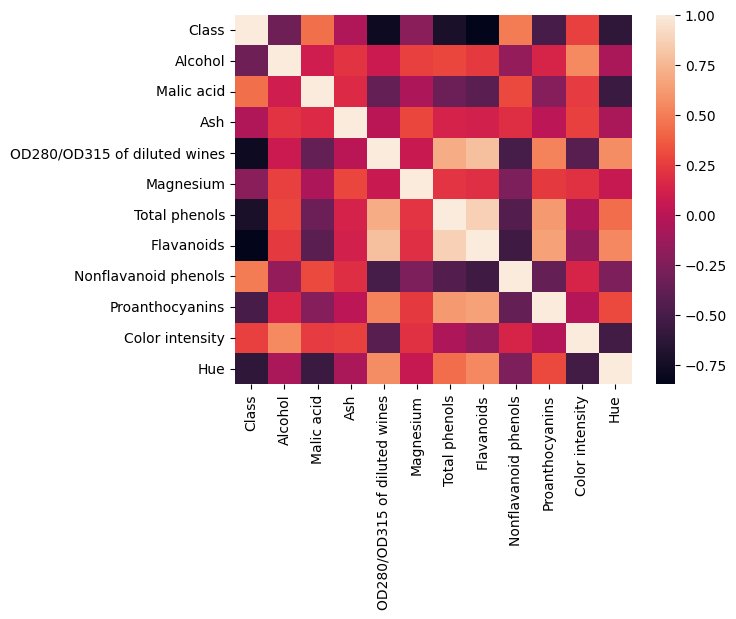

In [ ]:
sns.heatmap(binary.corr())

<Axes: xlabel='Alcohol', ylabel='Class'>

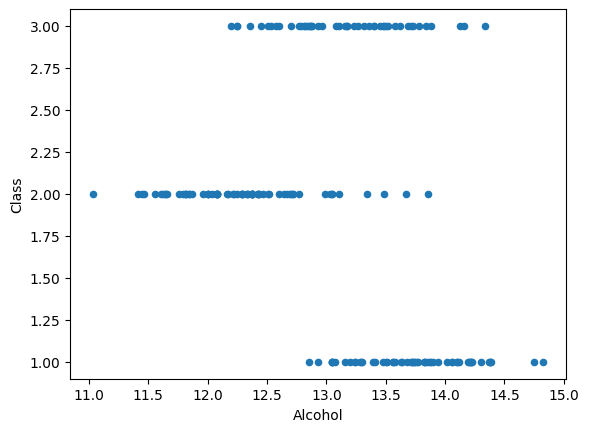

In [ ]:
binary.plot(kind='scatter', x='Alcohol', y='Class')

<Axes: xlabel='Malic acid', ylabel='Class'>

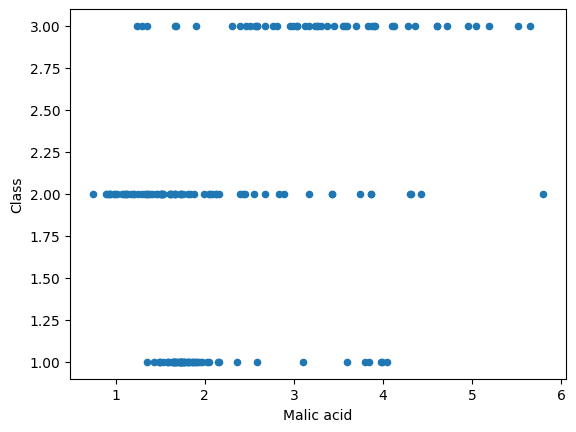

In [ ]:
binary.plot(kind='scatter', x='Malic acid', y='Class')

<Axes: xlabel='Ash', ylabel='Class'>

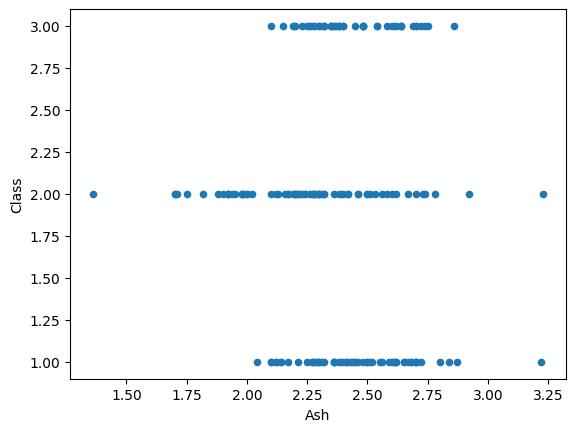

In [ ]:
binary.plot(kind='scatter', x='Ash', y='Class')

<Axes: xlabel='OD280/OD315 of diluted wines', ylabel='Class'>

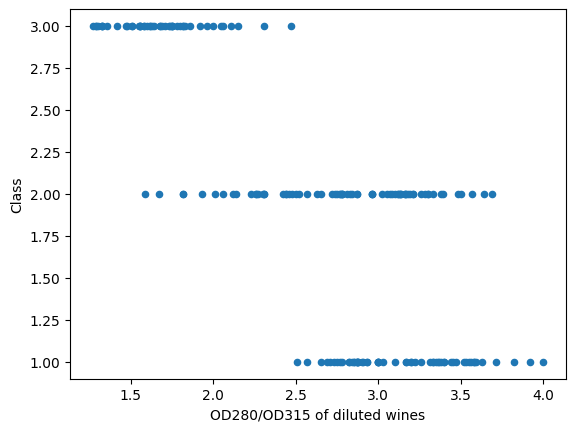

In [ ]:
binary.plot(kind='scatter', x='OD280/OD315 of diluted wines', y='Class')

<Axes: xlabel='Magnesium', ylabel='Class'>

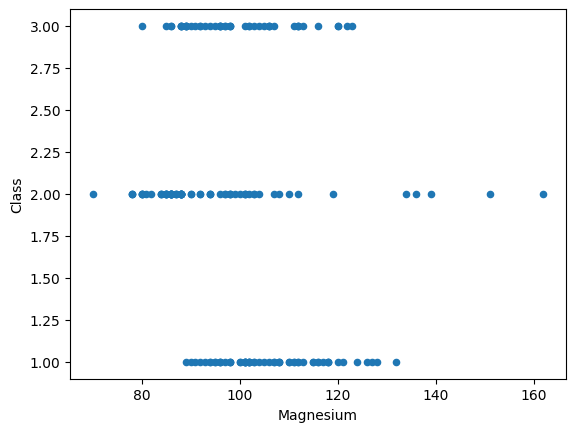

In [ ]:
binary.plot(kind='scatter', x='Magnesium', y='Class')

<Axes: xlabel='Total phenols', ylabel='Class'>

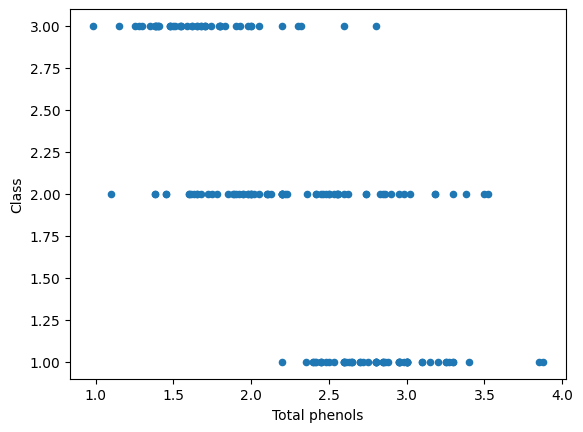

In [ ]:
binary.plot(kind='scatter', x='Total phenols', y='Class')

<Axes: xlabel='Flavanoids', ylabel='Class'>

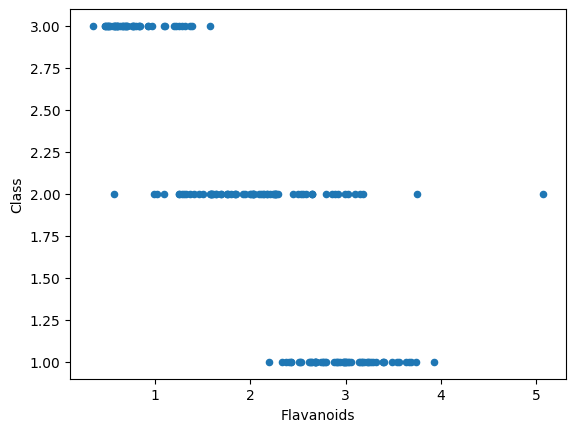

In [ ]:
binary.plot(kind='scatter', x='Flavanoids', y='Class')

<Axes: xlabel='Nonflavanoid phenols', ylabel='Class'>

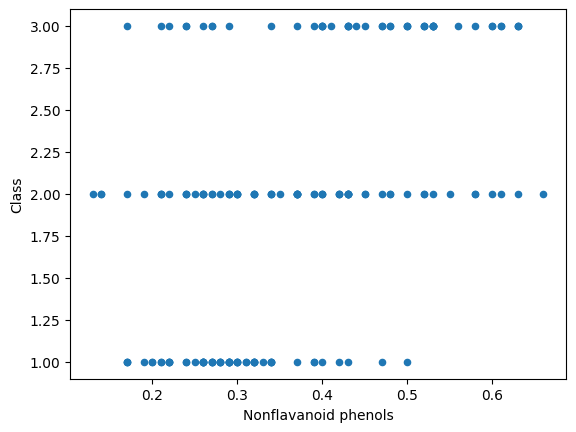

In [ ]:
binary.plot(kind='scatter', x='Nonflavanoid phenols', y='Class')

# **Methodology**

The methodology for implementing a Multi-Layer Perceptron (MLP) for multi-class classification entails a structured approach encompassing data preparation, model architecture design, initialization, forward propagation, loss function definition, backpropagation, training, evaluation, and fine-tuning. Initially, the dataset undergoes preprocessing, including cleaning and splitting into training and testing sets. The model architecture is then delineated, specifying input, hidden, and output layers, along with activation functions. Initialization sets the foundation by initializing weights and biases. During forward propagation, inputs traverse through layers, activating neurons successively. The loss function, typically categorical cross-entropy, quantifies the disparity between predicted and actual outcomes. Backpropagation recalibrates weights and biases iteratively, optimizing the network's performance. Training unfolds through multiple epochs, each iterating over mini-batches to refine the model's parameters. Evaluation measures the model's efficacy on unseen data, gauging metrics like accuracy and F1-score. Lastly, fine-tuning encompasses experimentation with architectures, hyperparameters, and regularization techniques to enhance generalization and combat overfitting, culminating in a robust MLP tailored for multi-class classification tasks.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
binary=pd.read_csv("/content/wine.csv")

In [ ]:
x=binary.drop('Class',axis=1)
y=binary['Class']
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.33, random_state=125
)

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(3,2), max_iter=500, activation= 'relu' )


In [ ]:
mlp.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(3, 2), max_iter=500)

In [ ]:
pred=mlp.predict(x_test)
pred

array([1, 1, 3, 3, 3, 2, 3, 2, 2, 2, 2, 1, 2, 3, 2, 1, 2, 2, 2, 2, 3, 2,
       2, 2, 1, 2, 2, 2, 1, 1, 3, 2, 3, 2, 2, 1, 2, 2, 1, 3, 1, 3, 1, 2,
       3, 2, 2, 1, 2, 2, 2, 3, 2, 1, 2, 2, 2, 1, 2])

In [ ]:
confusion_matrix(y_test,pred)

array([[ 9, 15,  0],
       [ 4, 18,  0],
       [ 1,  0, 12]])

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.64      0.38      0.47        24
           2       0.55      0.82      0.65        22
           3       1.00      0.92      0.96        13

    accuracy                           0.66        59
   macro avg       0.73      0.71      0.70        59
weighted avg       0.69      0.66      0.65        59



In [ ]:
from sklearn.metrics import classification_report
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, pred)
print("Accuracy:", accuracy)

Accuracy: 0.6610169491525424


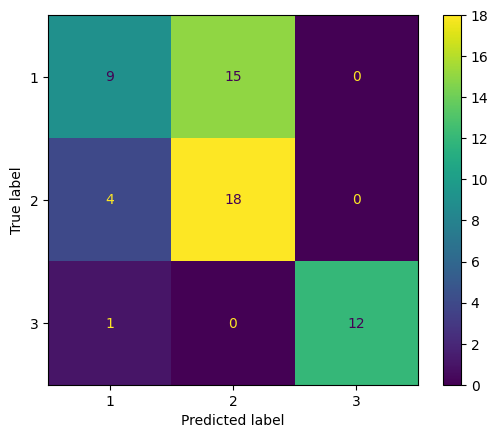

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test,pred, labels=mlp.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp.classes_)

disp.plot()
plt.show()

# **Result Analysis**

The performance metrics indicate varying levels of precision, recall, and F1-score across different classes. Class 1 exhibits a relatively lower precision of 0.64, suggesting that the model correctly identifies 64% of the instances belonging to class 1 out of all instances classified as class 1. However, its recall is notably lower at 0.38, indicating that only 38% of the actual instances of class 1 are correctly classified by the model. Class 2, on the other hand, demonstrates higher precision (0.55) and recall (0.82), signifying better performance in correctly identifying instances of class 2. Class 3 exhibits near-perfect precision and recall, indicating the model's exceptional ability to classify instances of class 3 accurately. The macro and weighted averages provide a comprehensive overview of the model's performance across all classes, with the macro average F1-score at 0.70 and the weighted average F1-score at 0.65. While the model achieves moderate accuracy at 66%, further improvements are warranted to enhance its precision and recall, particularly for class 1.

# **Conclusion**

In summary, the Multi-Layer Perceptron (MLP) model demonstrates promising capabilities in classifying instances across multiple classes. The model's overall accuracy of 66% suggests its proficiency in distinguishing between different classes. However, the discrepancies in precision and recall across individual classes indicate areas for improvement, particularly in class 1 classification where precision and recall are relatively lower. To enhance the model's performance, targeted strategies such as class-balanced sampling, feature engineering, and hyperparameter tuning may be explored. Additionally, incorporating techniques like class weighting or adjusting decision thresholds could help mitigate the imbalance and optimize the model's predictive performance across all classes. Thus, while the MLP shows potential, further refinement and optimization are essential to harness its full capabilities in multi-class classification tasks.

# **References**

 Binary Dataset Link: https://www.kaggle.com/datasets/bhaveshmisra/heart-disease-indicators?resource=download


 MUlti class Dataset Link: https://www.kaggle.com/datasets/morecoding/wine-dataset/data


Code reference: https://www.geeksforgeeks.org/multi-layer-perceptron-learning-in-tensorflow/


Code reference: https://pyimagesearch.com/2021/05/06/implementing-the-perceptron-neural-network-with-python/

